<h1>Logistic Regression</h1>

* is actually used for classification problem.
* For every value of X the hypothesis function Y always lies in between 0 and 1

f(X) = Y = [0,1]

<h2>Import Libraries</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<h2>Split X and Y</h3>

In [9]:
x = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [11]:
print("Independent Values(x)")
print(x.shape)
x.head()

Independent Values(x)
(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [12]:
print("Dependent Values(y)")
print(y.shape)
y.head()

Dependent Values(y)
(299,)


0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<h2>Split into Train and Test</h2>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

<h2>Model Fitting</h2>

In [15]:

multipleLogisticRegressers=LogisticRegression(solver='lbfgs', max_iter=200)

"""Error found: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result( """
#Source for solving: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
#My Guess: Data seems to be unpredictable. So it was difficult for our model to converge and give appropriate model for fitting.

model=multipleLogisticRegressers.fit(x_train,y_train)


c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print("***** Model Coefficients *****")
print(model.coef_)
print("*****Bias*****")
print(model.intercept_)

***** Model Coefficients *****
[[ 4.65020920e-02  5.52366336e-02  2.67903210e-04 -4.30130774e-02
  -7.71252405e-02 -3.69520002e-02 -1.13670537e-06  5.64189575e-01
   6.13409323e-03 -4.80827413e-02 -9.34040826e-02 -1.91920912e-02]]
*****Bias*****
[0.00922464]


<h2>Predict on test Data</h2>

In [17]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]
69     1
77     0
278    0
254    0
260    0
53     1
12     1
179    0
97     0
86     0
235    0
233    0
146    0
237    0
121    0
224    0
61     1
229    0
252    0
2      1
88     0
116    0
39     1
11     1
115    0
189    0
151    0
139    0
230    1
128    0
14     0
54     1
25     1
154    0
216    0
70     0
102    0
62     0
103    0
158    0
150    1
214    0
275    0
135    0
293    0
241    0
182    1
200    0
44     1
173    0
126    1
155    0
273    0
250    0
123    0
52     1
208    0
22     1
256    0
41     1
Name: DEATH_EVENT, dtype: int64


<h2>Evaluation Metrices</h2>

In [18]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [19]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test))
print("Precision-Score :",precision_score(y_pred,y_test))
print("F1-Score :",f1_score(y_pred,y_test))

Model's acuracy : 0.8333333333333334
Recall-Score : 0.7058823529411765
Precision-Score : 0.7058823529411765
F1-Score : 0.7058823529411765


<h2>Classification Report</h2>

In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.71      0.71      0.71        17

    accuracy                           0.83        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.83      0.83      0.83        60



<h2>Confusion Metrics</h2>

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

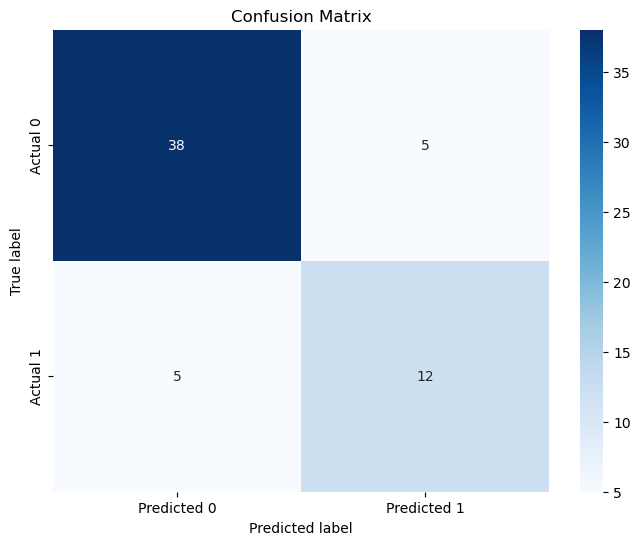

In [22]:

# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()